In [3]:
import google.datalab.bigquery as bq
import pandas as p

In [4]:
bq.query('#standardSQL
SELECT 
TIMESTAMP_TRUNC(pickup_datetime,DAY) as single_day, 
SUM(passenger_count) as passengers_sum 
FROM `nyc-tlc.yellow.trips`
where pickup_datetime < "2015-01-01 00:00:00"
GROUP BY
 1
ORDER BY
 1;
')

SyntaxError: EOL while scanning string literal (<ipython-input-4-d62027e16e18>, line 1)

# ERROR
#### The error occured because I did not paste the bigQuery in a single line string. Instead I pasted it as a multiline string which is not accepted. Hence the error. The corrected version of the datalab query is as below:

In [21]:
Passenger_sum = bq.Query('SELECT TIMESTAMP_TRUNC(pickup_datetime,DAY) as single_day, SUM(passenger_count) as passengers_sum FROM `nyc-tlc.yellow.trips` where pickup_datetime <= "2015-01-01" GROUP BY 1 ORDER BY 1')
df = Passenger_sum.execute(output_options=bq.QueryOutput.dataframe()).result()
df.head(2191)

,single_day,passengers_sum
0,2009-01-01,602881
1,2009-01-02,696549
2,2009-01-03,811114
3,2009-01-04,667293
4,2009-01-05,609774
5,2009-01-06,703579
6,2009-01-07,582678
7,2009-01-08,786435
8,2009-01-09,880413
9,2009-01-10,873915


In [23]:
%%bq query --name passenger_1
SELECT 
TIMESTAMP_TRUNC(pickup_datetime,DAY) as single_day, 
SUM(passenger_count) as passengers_sum 
FROM `nyc-tlc.yellow.trips` where pickup_datetime >= '2009-01-01' and pickup_datetime <= '2010-01-10' GROUP BY 1 ORDER BY 1;

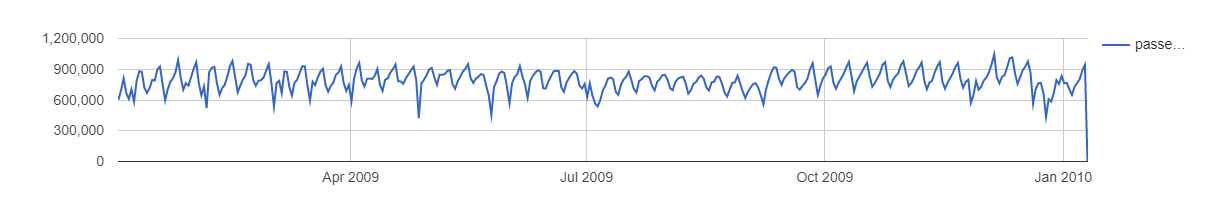

In [24]:
%chart line --data passenger_1 --fields single_day,passengers_sum

In [25]:
%%bq query --name passenger_2
SELECT 
TIMESTAMP_TRUNC(pickup_datetime,DAY) as single_day, 
SUM(passenger_count) as passengers_sum 
FROM `nyc-tlc.yellow.trips` where pickup_datetime >= '2010-01-01' and pickup_datetime <= '2011-01-10' GROUP BY 1 ORDER BY 1;

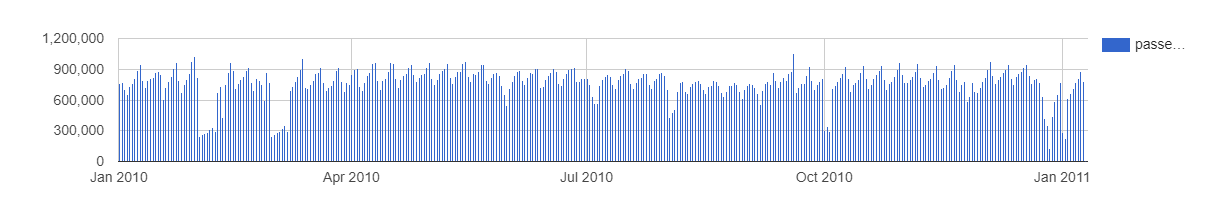

In [28]:
%chart columns --data passenger_2 --fields single_day,passengers_sum

In [29]:
%%bq query --name passenger_3
SELECT 
TIMESTAMP_TRUNC(pickup_datetime,DAY) as single_day, 
SUM(passenger_count) as passengers_sum 
FROM `nyc-tlc.yellow.trips` where pickup_datetime >= '2014-01-01' and pickup_datetime <= '2015-01-10' GROUP BY 1 ORDER BY 1;

In [31]:
%chart annotation --data passenger_3 --fields single_day,passengers_sum

In [32]:
%%bq query --name passenger_4
SELECT 
TIMESTAMP_TRUNC(pickup_datetime,DAY) as single_day, 
SUM(passenger_count) as passengers_sum 
FROM `nyc-tlc.yellow.trips` where pickup_datetime >= '2011-01-01' and pickup_datetime <= '2013-12-31' GROUP BY 1 ORDER BY 1;

In [33]:
%chart annotation --data passenger_4 --fields single_day,passengers_sum